<a href="https://colab.research.google.com/github/oderofrancis/kenya_population/blob/main/kenya_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# pip install geopandas

In [130]:
import pandas as pd

import geopandas as gpd

In [200]:
data = pd.read_csv('/content/drive/MyDrive/GIS data/kenya-populationland-area-population-density_by_subcounty.csv')

In [201]:
data.columns

Index(['National/ County', 'Population', 'Land Area (Sq. Km)',
       'Population Density (No. per Sq. Km)'],
      dtype='object')

In [202]:
data.dropna( inplace= True)

data.columns = ['constituency','population','land area','pop_density']

In [203]:
data[data['constituency']=='Mombasa']

,constituency,population,land area,pop_density
0,Mombasa,1208333,219.9,5495


In [205]:
data.tail(10)

,constituency,population,land area,pop_density
385,Embakasi,988808,86.3,11460
386,Kamukunji,268276,10.5,25455
387,Kasarani,780656,86.2,9058
388,Kibra .,185777,12.1,15311
389,Lang'ata,197489,216.8,911
390,Makadara,189536,11.7,16150
391,Mathare,206564,3.0,68941
392,Njiru .,626482,129.9,4821
393,Starehe,210423,20.6,10205
394,Westlands,308854,97.5,3167


In [147]:
len(data)

395

In [206]:
const = gpd.read_file('/content/drive/MyDrive/GIS data/constituencies.shp')

const.tail(2)

,OBJECTID,COUNTY_NAM,CONST_CODE,CONSTITUEN,COUNTY_ASS,COUNTY_A_1,REGIST_CEN,REGISTRATI,COUNTY_COD,Shape_Leng,Shape_Area,geometry
293,348,None,0.0,None,0.0,None,0.0,None,0.0,0.017963,0.000011,"POLYGON ((34.78616 -0.11375, 34.78592 -0.11662..."
294,349,None,0.0,None,0.0,None,0.0,None,0.0,0.017125,0.000007,"POLYGON ((34.78433 -0.11284, 34.78592 -0.11662..."


In [180]:
const = const[['COUNTY_NAM','CONST_CODE','CONSTITUEN','COUNTY_COD','geometry']]

const.columns = ['county_name','const_code','constituency','county_code','geometry']

const.tail(10)

,county_name,const_code,constituency,county_code,geometry
285,MIGORI,255.0,SUNA EAST,44.0,"POLYGON ((34.36294 -0.98442, 34.36813 -0.98778..."
286,MIGORI,256.0,SUNA WEST,44.0,"POLYGON ((34.33162 -0.99970, 34.33413 -1.00047..."
287,LAIKIPIA,163.0,LAIKIPIA WEST,31.0,"POLYGON ((36.56393 0.54573, 36.53372 0.47573, ..."
288,LAIKIPIA,164.0,LAIKIPIA EAST,31.0,"POLYGON ((36.90382 0.03788, 36.90652 0.03517, ..."
289,MOMBASA,1.0,CHANGAMWE,1.0,"POLYGON ((39.60545 -4.00855, 39.60649 -4.00897..."
290,None,0.0,None,0.0,"POLYGON ((34.75454 -0.03184, 34.75412 -0.03593..."
291,None,0.0,None,0.0,"POLYGON ((34.77883 -0.12278, 34.77511 -0.12327..."
292,None,0.0,None,0.0,"POLYGON ((34.77871 -0.12285, 34.77212 -0.12437..."
293,None,0.0,None,0.0,"POLYGON ((34.78616 -0.11375, 34.78592 -0.11662..."
294,None,0.0,None,0.0,"POLYGON ((34.78433 -0.11284, 34.78592 -0.11662..."


In [183]:
const.dropna(inplace=True)

len(const)

290

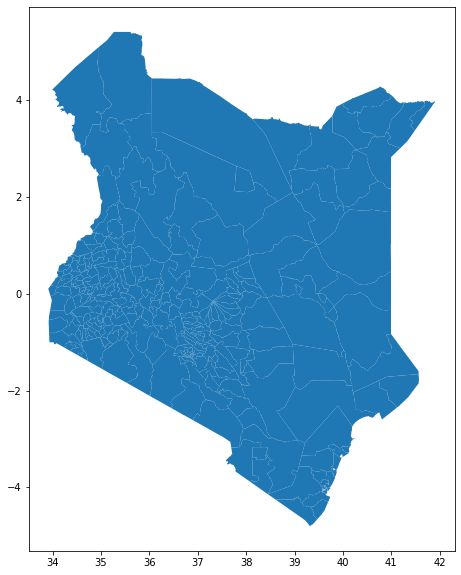

In [184]:
const.plot(figsize=(10,10))

In [185]:
len(const)

290

In [186]:
const[const['constituency']=='KASARANI']

,county_name,const_code,constituency,county_code,geometry
7,NAIROBI,280.0,KASARANI,47.0,"POLYGON ((37.06335 -1.20526, 37.07031 -1.21776..."


In [187]:

# data = pd.merge(data,const, on='constituency')

# data.head()

In [195]:
def capitalize_first_letter(string):
    if string is None:
        return string
    return string.capitalize()

In [197]:
const['constituency'] = const['constituency'].apply(capitalize_first_letter)

const['county_name'] = const['county_name'].apply(capitalize_first_letter)

In [198]:
const

,county_name,const_code,constituency,county_code,geometry
0,Nairobi,288.0,Kamukunji,47.0,"POLYGON ((36.87595 -1.26253, 36.87894 -1.26246..."
1,Nairobi,274.0,Westlands,47.0,"POLYGON ((36.81926 -1.20643, 36.83463 -1.21494..."
2,Nairobi,275.0,Dagoretti north,47.0,"POLYGON ((36.79214 -1.26085, 36.79290 -1.26106..."
3,Nairobi,279.0,Roysambu,47.0,"POLYGON ((36.90578 -1.16138, 36.90731 -1.16181..."
4,Nairobi,289.0,Starehe,47.0,"POLYGON ((36.84275 -1.26460, 36.84375 -1.26768..."
...,...,...,...,...,...
285,Migori,255.0,Suna east,44.0,"POLYGON ((34.36294 -0.98442, 34.36813 -0.98778..."
286,Migori,256.0,Suna west,44.0,"POLYGON ((34.33162 -0.99970, 34.33413 -1.00047..."
287,Laikipia,163.0,Laikipia west,31.0,"POLYGON ((36.56393 0.54573, 36.53372 0.47573, ..."
288,Laikipia,164.0,Laikipia east,31.0,"POLYGON ((36.90382 0.03788, 36.90652 0.03517, ..."
